In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from src.utils.custom_formatter import setup_custom_logger
logger = setup_custom_logger(__name__, level=logging.DEBUG)

- Load dataset to have actual returns and market returns

In [2]:
from src import Analyzer
from src.utils.params import ReturnParams
from src import RiskTests

import numpy as np

return_params = ReturnParams(
    horizons={h for h in range(1,120+1)},  
    start_date=None,
#    end_date="2020-02-03",
    cumulative=False,
    append_start=False
)

an_voo = Analyzer(compare_tickers=["VOO"], return_params=return_params, stocks_only=False, weights_application="wealth", dl_kwargs={"weights_method":"dollar"})


rt = RiskTests(an_voo)

2025-05-23 16:40:33,156 - src.analyzer - INFO - ------------------------------ Analysis Started ------------------------------ (analyzer.py:80)


In [3]:
df_ret = an_voo.build_returns()[0]
df_ret = df_ret.apply(np.exp)
df_ret 

rh_portfolio       VOO  rh_portfolio_1_return  VOO_1_return  \
date                                                                      
2018-05-03      0.993973  1.000000               0.993973      1.000000   
2018-05-04      1.016832  1.013266               1.016832      1.013266   
2018-05-07      1.008523  1.003110               1.008523      1.003110   
2018-05-08      1.004133  0.999959               1.004133      0.999959   
2018-05-09      1.010288  1.009708               1.010288      1.009708   
...                  ...       ...                    ...           ...   
2020-08-07      0.996141  1.000521               0.996141      1.000521   
2020-08-10      1.019014  1.003188               1.019014      1.003188   
2020-08-11      0.980078  0.991925               0.980078      0.991925   
2020-08-12      1.006672  1.013700               1.006672      1.013700   
2020-08-13      1.004269  0.998291               1.004269      0.998291   

            rh_portfolio_2_return  VOO_2_return  rh_portfolio_3_return  \
date                                                                     
2018-05-03                    NaN           NaN                    NaN   
2018-05-04               1.010703      1.013266                    NaN   
2018-05-07               1.025498      1.016417               1.019317   
2018-05-08               1.012692      1.003069               1.029737   
2018-05-09               1.014464      1.009667               1.023111   
...                           ...           ...                    ...   
2020-08-07               0.994643      1.007242               1.009952   
2020-08-10               1.015081      1.003711               1.013554   
2020-08-11               0.998713      0.995087               0.994859   
2020-08-12               0.986617      1.005513               1.005376   
2020-08-13               1.010969      1.011967               0.990829   

            VOO_3_return  rh_portfolio_4_return  VOO_4_return  ...  \
date                                                           ...   
2018-05-03           NaN                    NaN           NaN  ...   
2018-05-04           NaN                    NaN           NaN  ...   
2018-05-07      1.016417                    NaN           NaN  ...   
2018-05-08      1.016376               1.023530      1.016376  ...   
2018-05-09      1.012806               1.040331      1.026243  ...   
...                  ...                    ...           ...  ...   
2020-08-07      1.013520               1.024548      1.017782  ...   
2020-08-10      1.010454               1.029155      1.016751  ...   
2020-08-11      0.995605               0.993363      1.002294  ...   
2020-08-12      1.008719               1.001496      1.009245  ...   
2020-08-13      1.003795               1.009669      1.006995  ...   

            rh_portfolio_116_return  VOO_116_return  rh_portfolio_117_return  \
date                                                                           
2018-05-03                      NaN             NaN                      NaN   
2018-05-04                      NaN             NaN                      NaN   
2018-05-07                      NaN             NaN                      NaN   
2018-05-08                      NaN             NaN                      NaN   
2018-05-09                      NaN             NaN                      NaN   
...                             ...             ...                      ...   
2020-08-07                 1.217148        1.037537                 1.172040   
2020-08-10                 1.279781        1.073084                 1.240290   
2020-08-11                 1.266462        1.069144                 1.254286   
2020-08-12                 1.327527        1.134058                 1.274912   
2020-08-13                 1.326544        1.138993                 1.333195   

            VOO_117_return  rh_portfolio_118_return  VOO_118_return  \
date                                              

In [4]:
import numpy as np
from scipy import stats

def mean_diff_ci(a, b):

    # Sample statistics
    mean_diff = np.mean(a) - np.mean(b)
    n1, n2 = len(a), len(b)
    var1, var2 = np.var(a, ddof=1), np.var(b, ddof=1)  # sample variances

    # Standard error of the difference
    se_diff = np.sqrt(var1/n1 + var2/n2)

    # Degrees of freedom (Welch-Satterthwaite equation)
    df = (var1/n1 + var2/n2)**2 / ((var1**2)/(n1**2 * (n1-1)) + (var2**2)/(n2**2 * (n2-1)))

    # t-critical value for 95% CI
    alpha = 0.05
    t_crit = stats.t.ppf(1 - alpha/2, df)

    # Confidence interval
    ci_lower = mean_diff - t_crit * se_diff
    ci_upper = mean_diff + t_crit * se_diff

    return mean_diff, ci_lower, ci_upper 
    print(f"Mean difference: {mean_diff:.4f}")
    print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")

In [7]:
rt.factors

xmkt     smb     hml     rmw     cma       rf     umd  \
2018-06-04  0.004355  0.0015 -0.0046  0.0106 -0.0030  0.00006  0.0017   
2018-06-05  0.001326  0.0079 -0.0043  0.0023  0.0011  0.00006  0.0029   
2018-06-06  0.007928 -0.0028  0.0019 -0.0002  0.0015  0.00006 -0.0001   
2018-06-07 -0.000531 -0.0024  0.0091  0.0017  0.0059  0.00006 -0.0091   
2018-06-08  0.003080  0.0005 -0.0041  0.0027 -0.0019  0.00006 -0.0013   
...              ...     ...     ...     ...     ...      ...     ...   
2020-08-07  0.000521  0.0152  0.0234  0.0049  0.0017  0.00000 -0.0201   
2020-08-10  0.003188  0.0127  0.0166  0.0086  0.0124  0.00000 -0.0282   
2020-08-11 -0.008075  0.0018  0.0157  0.0089  0.0007  0.00000 -0.0221   
2020-08-12  0.013700 -0.0081 -0.0130  0.0095 -0.0014  0.00000  0.0187   
2020-08-13 -0.001709 -0.0012 -0.0130 -0.0063 -0.0055  0.00000  0.0155   

            rh_portfolio       mkt        xr  
2018-06-04      0.007979  0.004415  0.007919  
2018-06-05      0.007667  0.001386  0.007607  
2018-06-06      0.009567  0.007988  0.009507  
2018-06-07     -0.004559 -0.000471 -0.004619  
2018-06-08      0.003475  0.003140  0.003415  
...                  ...       ...       ...  
2020-08-07     -0.003859  0.000521 -0.003859  
2020-08-10      0.019014  0.003188  0.019014  
2020-08-11     -0.019922 -0.008075 -0.019922  
2020-08-12      0.006672  0.013700  0.006672  
2020-08-13      0.004269 -0.001709  0.004269  

[539 rows x 10 columns]

## Welfare Loss

Gamma: 1.7817


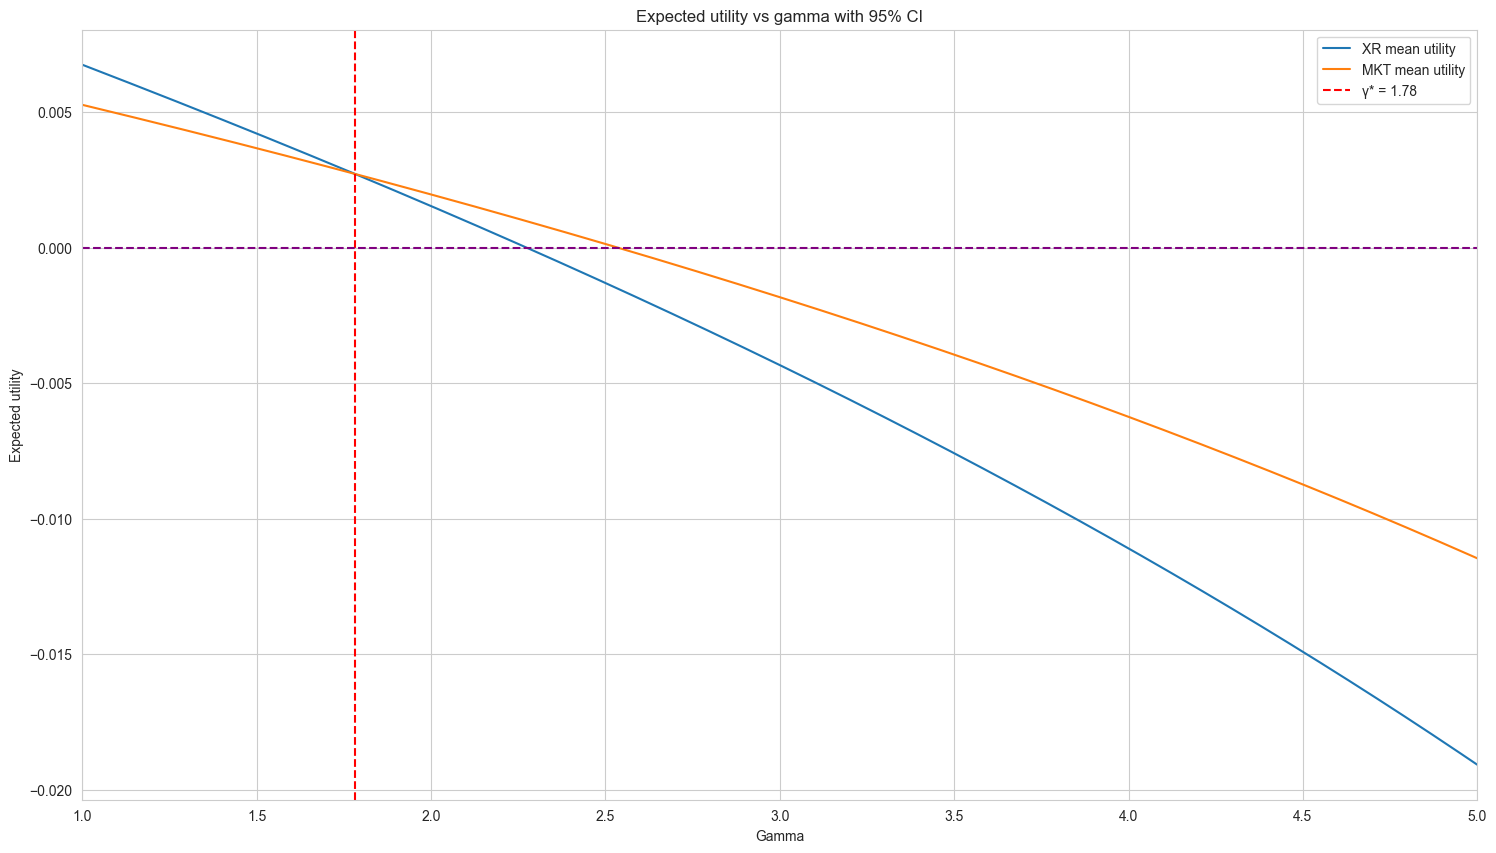

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils.metrics import find_gamma_certainty_equivalent, paramteric_expected_utility_crra, compute_crra_utility
import seaborn as sns

sns.set_style("whitegrid")

d = 30
#mkt = f"VOO_{d}_return"
#r = f"rh_portfolio_{d}_return"
mkt = f"xmkt"
r = f"xr"
df_voo = rt.resample_factors(f"{d}D") + 1
parametric = False




# keep the scalar returned by the CE condition
gamma_hat = find_gamma_certainty_equivalent(df_voo[r],
                                            df_voo[mkt],
                                            parametric=parametric)

print(f"Gamma: {gamma_hat:.4f}")

lo = 1
hi = 5
gap = 5
gammas = np.linspace(lo, hi, 1000)

utilities_xr  = []
utilities_voo = []
ut_diff = []

for g in gammas:
    #utilities_xr.append(compute_crra_utility(df["xr"], g, mean=True, confint=True))
    #utilities_xmkt.append(compute_crra_utility(df["xmkt"], g, mean=True, confint=True))
    ut_xr = compute_crra_utility(df_voo[r], g, mean=False)
    ut_xmkt = compute_crra_utility(df_voo[mkt], g, mean=False)

    ut_diff.append(mean_diff_ci(ut_xr, ut_xmkt))

    utilities_xr.append(np.mean(ut_xr))
    utilities_voo.append(np.mean(ut_xmkt))


means_diff, lo_diff, hi_diff = zip(*ut_diff)
#means_xr, lo_xr, hi_xr = zip(*utilities_xr)
#means_mk, lo_mk, hi_mk = zip(*utilities_xmkt)

means_xr = utilities_xr
means_mk = utilities_voo


plot=True

if plot:
    # Plot
    import matplotlib.pyplot as plt

    plt.figure(figsize=(18,10))
    plt.plot(gammas, means_xr, label='XR mean utility', color='C0')
    #plt.fill_between(gammas, lo_xr, hi_xr, color='C0', alpha=0.2)

    plt.plot(gammas, means_mk, label='MKT mean utility', color='C1')
    #plt.fill_between(gammas, lo_mk, hi_mk, color='C1', alpha=0.2)

    #plt.plot(gammas, means_diff, label='Difference in mean utility', color='C2')
    #plt.fill_between(gammas, lo_diff, hi_diff, color='C2', alpha=0.2)

    plt.axvline(gamma_hat, color='red', linestyle='--', label=f'γ* = {gamma_hat:.2f}')
    plt.axhline(0, color='purple', linestyle='--')
    plt.xlabel('Gamma')
    plt.xlim((lo,hi))
    plt.ylabel('Expected utility')
    plt.title('Expected utility vs gamma with 95% CI')
    plt.legend()
    plt.grid(True)
    plt.show()




In [7]:
def certainty_equivalent(utility:float, gamma:float)->float:
    """
    Compute the certainty equivalent from a utility value and a risk aversion parameter
    """
    ce = ((1-gamma)*utility+1)**(1/(1-gamma))

    return ce



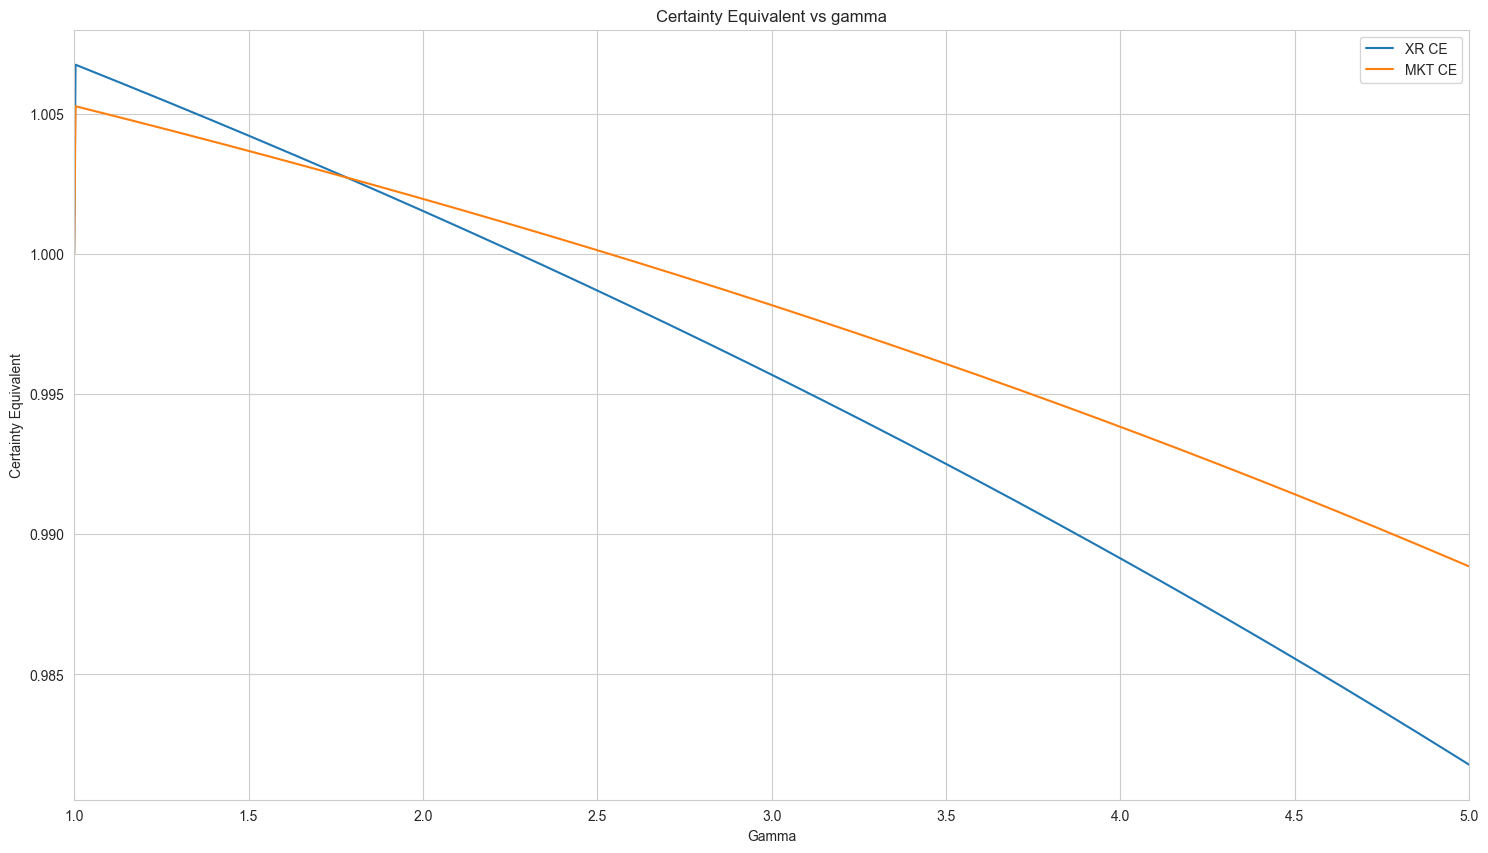

In [8]:
from src.utils.metrics import find_gamma_certainty_equivalent, paramteric_expected_utility_crra, compute_crra_utility
import seaborn as sns

sns.set_style("whitegrid")



import numpy as np
import matplotlib.pyplot as plt


plot=True

welfare_xr = [certainty_equivalent(means_xr[g], gammas[g]) for g in range(len(gammas))]
welfare_mk = [certainty_equivalent(means_mk[g], gammas[g]) for g in range(len(gammas))]


if plot:
    # Plot
    import matplotlib.pyplot as plt

    plt.figure(figsize=(18,10))
    plt.plot(gammas, welfare_xr, label='XR CE', color='C0')
    #plt.fill_between(gammas, lo_xr, hi_xr, color='C0', alpha=0.2)

    plt.plot(gammas, welfare_mk, label='MKT CE', color='C1')
    #plt.fill_between(gammas, lo_mk, hi_mk, color='C1', alpha=0.2)

    #plt.plot(gammas, means_diff, label='Difference in mean utility', color='C2')
    #plt.fill_between(gammas, lo_diff, hi_diff, color='C2', alpha=0.2)

    #plt.axvline(gamma_hat, color='red', linestyle='--', label=f'γ* = {gamma_hat:.2f}')
    #plt.axhline(0, color='purple', linestyle='--')


    #plt.plot(gammas, [m+1 for m in means_xr], label='XR mean utility', color='C2')
    #plt.fill_between(gammas, lo_xr, hi_xr, color='C0', alpha=0.2)

    #plt.plot(gammas, [m+1 for m in means_mk], label='MKT mean utility', color='C3')
    #plt.fill_between(gammas, lo_mk, hi_mk, color='C1', alpha=0.2)

    #plt.plot(gammas, means_diff, label='Difference in mean utility', color='C2')
    #plt.fill_between(gammas, lo_diff, hi_diff, color='C2', alpha=0.2)

    

    plt.xlabel('Gamma')
    plt.xlim((lo,hi))
    plt.ylabel('Certainty Equivalent')
    plt.title('Certainty Equivalent vs gamma')
    plt.legend()
    plt.grid(True)
    plt.show()


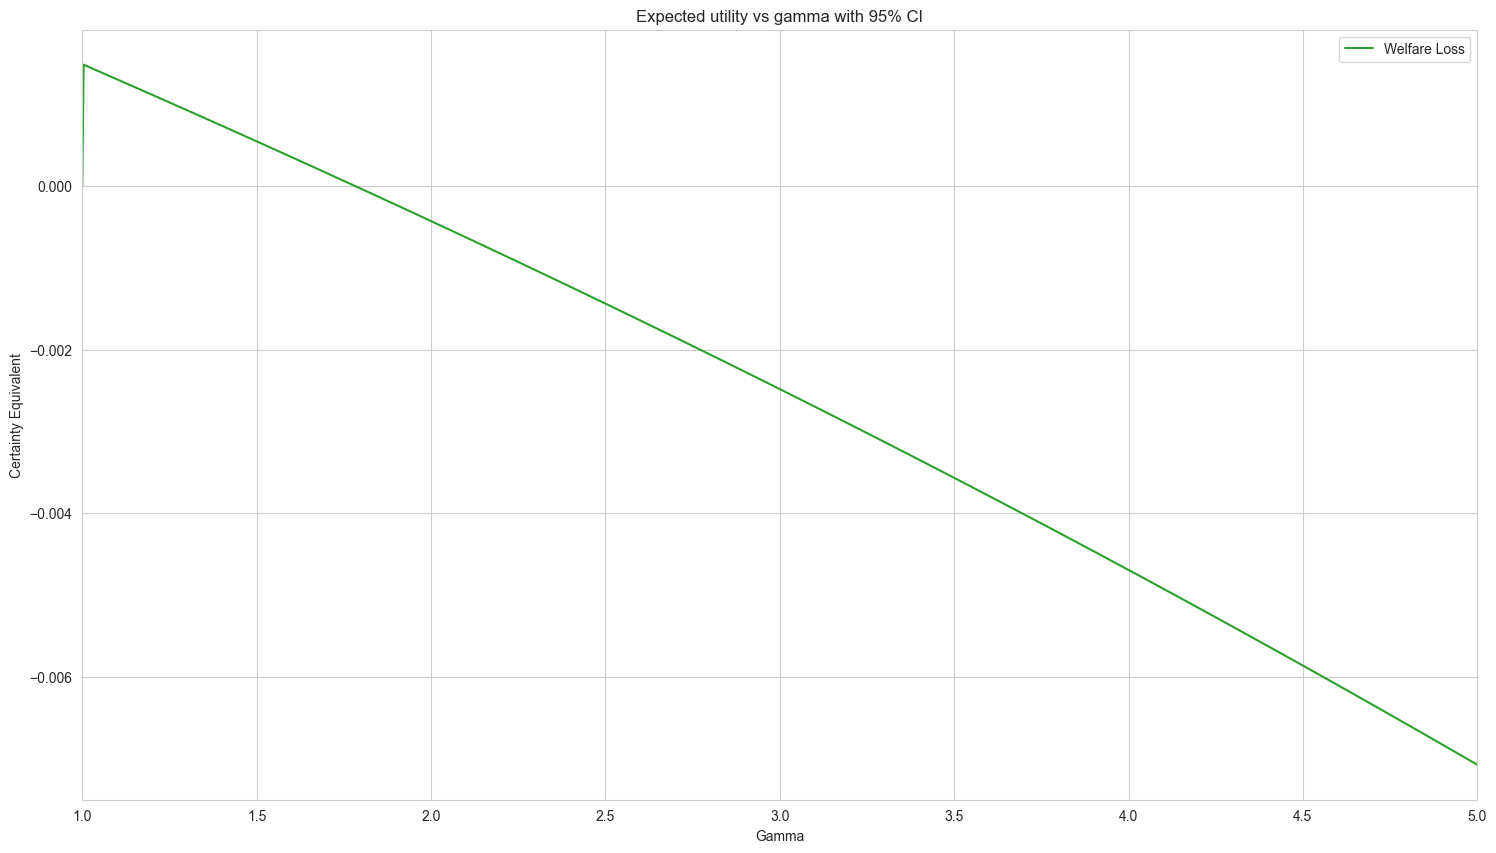

In [9]:
from src.utils.metrics import find_gamma_certainty_equivalent, paramteric_expected_utility_crra, compute_crra_utility
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


plot=True

welfare_xr = [certainty_equivalent(means_xr[g], gammas[g]) for g in range(len(gammas))]
welfare_mk = [certainty_equivalent(means_mk[g], gammas[g]) for g in range(len(gammas))]

welfare_loss = [x-m for x,m in zip(welfare_xr, welfare_mk)]

if plot:
    # Plot
    import matplotlib.pyplot as plt

    plt.figure(figsize=(18,10))
    #plt.plot(gammas, welfare_xr, label='XR CE', color='C0')
    #plt.fill_between(gammas, lo_xr, hi_xr, color='C0', alpha=0.2)

    #plt.plot(gammas, welfare_mk, label='MKT CE', color='C1')
    #plt.fill_between(gammas, lo_mk, hi_mk, color='C1', alpha=0.2)


    plt.plot(gammas, welfare_loss, label='Welfare Loss', color='C2')
    #plt.axvline(gamma_hat, color='red', linestyle='--', label=f'γ* = {gamma_hat:.2f}')
    #plt.axhline(0, color='purple', linestyle='--')



    

    plt.xlabel('Gamma')
    plt.xlim((lo,hi))
    plt.ylabel('Certainty Equivalent')
    plt.title('Expected utility vs gamma with 95% CI')
    plt.legend()
    plt.grid(True)
    plt.show()


In [20]:
import pandas as pd
from tqdm import tqdm


lo = 1
hi = 5
gap = 5
gammas = np.linspace(lo, hi, 1000)

df_plot = pd.DataFrame(columns=gammas)

for d in tqdm(range(1,120+1)):
    #print(d)

    df = df_ret[[f"rh_portfolio_{d}_return", f"VOO_{d}_return"]].dropna().copy().apply(lambda x: x**(1/d))
    #df = rt.resample_factors(f"{d}D")+1
    #df = df[["xr", "xmkt"]]
    #df = df.dropna().copy().apply(lambda x: x**(1/d))


    utilities_xr  = []
    utilities_xmkt = []     
    utilities_voo = []
    ut_diff = []

    for g in gammas:
        #utilities_xr.append(compute_crra_utility(df["xr"], g, mean=True, confint=False))
        #utilities_xmkt.append(compute_crra_utility(df["xmkt"], g, mean=True, confint=False))
        ut_xr = compute_crra_utility(df[f"rh_portfolio_{d}_return"], g, mean=False)
        ut_xmkt = compute_crra_utility(df[f"VOO_{d}_return"], g, mean=False)

        ut_diff.append(mean_diff_ci(ut_xr, ut_xmkt))

        utilities_xr.append(np.mean(ut_xr))
        utilities_voo.append(np.mean(ut_xmkt))


    welfare_xr = [certainty_equivalent(utilities_xr[g], gammas[g]) for g in range(len(gammas))]
    welfare_mk = [certainty_equivalent(utilities_voo[g], gammas[g]) for g in range(len(gammas))]

    welfare_loss = [x-m for x,m in zip(welfare_xr, welfare_mk)]
    #welfare_loss = [x-1 for x in welfare_xr]

    df_plot.loc[d,:] = welfare_loss


100%|██████████| 120/120 [01:06<00:00,  1.81it/s]


In [64]:
df_plot

1.0000    1.0040    1.0080    1.0120    1.0160    1.0200    1.0240  \
1       0.0 -0.000153  0.000113 -0.000153  0.000112 -0.000153  0.000111   
2       0.0 -0.000153  0.000113 -0.000153  0.000113 -0.000153  0.000112   
3       0.0 -0.000153  0.000112 -0.000153  0.000112 -0.000153  0.000112   
4       0.0 -0.000153  0.000112 -0.000153  0.000112 -0.000153  0.000112   
5       0.0 -0.000153  0.000112 -0.000153  0.000112 -0.000153  0.000112   
..      ...       ...       ...       ...       ...       ...       ...   
116     0.0 -0.000153  0.000110 -0.000153  0.000110 -0.000153  0.000110   
117     0.0 -0.000153  0.000108 -0.000153  0.000108 -0.000153  0.000108   
118     0.0 -0.000153  0.000107 -0.000153  0.000107 -0.000153  0.000107   
119     0.0 -0.000153  0.000105 -0.000153  0.000105 -0.000153  0.000105   
120     0.0 -0.000153  0.000103 -0.000153  0.000103 -0.000153  0.000103   

       1.0280    1.0320    1.0360  ...    4.9640    4.9680    4.9720  \
1   -0.000153  0.000111 -0.000153  ... -0.000167 -0.000153 -0.000167   
2   -0.000153  0.000112 -0.000153  ... -0.000030 -0.000153 -0.000030   
3   -0.000153  0.000112 -0.000153  ...  0.000018 -0.000153  0.000018   
4   -0.000153  0.000112 -0.000153  ...  0.000029 -0.000153  0.000029   
5   -0.000153  0.000112 -0.000153  ...  0.000058 -0.000153  0.000058   
..        ...       ...       ...  ...       ...       ...       ...   
116 -0.000153  0.000110 -0.000153  ...  0.000109 -0.000153  0.000109   
117 -0.000153  0.000108 -0.000153  ...  0.000107 -0.000153  0.000107   
118 -0.000153  0.000107 -0.000153  ...  0.000105 -0.000153  0.000105   
119 -0.000153  0.000105 -0.000153  ...  0.000103 -0.000153  0.000103   
120 -0.000153  0.000103 -0.000153  ...  0.000102 -0.000153  0.000102   

       4.9760    4.9800    4.9840    4.9880    4.9920    4.9960    5.0000  
1   -0.000153 -0.000168 -0.000153 -0.000168 -0.000153 -0.000169 -0.000153  
2   -0.000153 -0.000031 -0.000153 -0.000031 -0.000153 -0.000031 -0.000153  
3   -0.000153  0.000018 -0.000153  0.000018 -0.000153  0.000017 -0.000153  
4   -0.000153  0.000029 -0.000153  0.000029 -0.000153  0.000029 -0.000153  
5   -0.000153  0.000058 -0.000153  0.000058 -0.000153  0.000058 -0.000153  
..        ...       ...       ...       ...       ...       ...       ...  
116 -0.000153  0.000109 -0.000153  0.000109 -0.000153  0.000109 -0.000153  
117 -0.000153  0.000107 -0.000153  0.000107 -0.000153  0.000107 -0.000153  
118 -0.000153  0.000105 -0.000153  0.000105 -0.000153  0.000105 -0.000153  
119 -0.000153  0.000103 -0.000153  0.000103 -0.000153  0.000103 -0.000153  
120 -0.000153  0.000102 -0.000153  0.000102 -0.000153  0.000102 -0.000153  

[120 rows x 1000 columns]

In [21]:
df_plot = df_plot.apply(pd.to_numeric, errors='coerce')
#df_plot.columns = [format(c, ".4f") for c in df_plot.columns]
df_numeric = df_plot
#df_numeric = df_numeric.replace(0, 0.000001)
df_numeric


1.000000  1.004004  1.008008  1.012012  1.016016  1.020020  1.024024  \
1         0.0  0.000112  0.000112  0.000112  0.000111  0.000111  0.000111   
2         0.0  0.000113  0.000112  0.000112  0.000112  0.000112  0.000112   
3         0.0  0.000115  0.000115  0.000115  0.000114  0.000114  0.000114   
4         0.0  0.000119  0.000119  0.000119  0.000119  0.000119  0.000118   
5         0.0  0.000115  0.000114  0.000114  0.000114  0.000114  0.000114   
..        ...       ...       ...       ...       ...       ...       ...   
116       0.0 -0.000146 -0.000146 -0.000146 -0.000146 -0.000146 -0.000146   
117       0.0 -0.000147 -0.000147 -0.000147 -0.000147 -0.000147 -0.000147   
118       0.0 -0.000149 -0.000149 -0.000149 -0.000149 -0.000149 -0.000149   
119       0.0 -0.000151 -0.000151 -0.000151 -0.000151 -0.000151 -0.000151   
120       0.0 -0.000152 -0.000152 -0.000152 -0.000152 -0.000152 -0.000152   

     1.028028  1.032032  1.036036  ...  4.963964  4.967968  4.971972  \
1    0.000110  0.000110  0.000110  ... -0.000197 -0.000197 -0.000198   
2    0.000111  0.000111  0.000111  ... -0.000086 -0.000086 -0.000086   
3    0.000114  0.000114  0.000114  ... -0.000040 -0.000040 -0.000040   
4    0.000118  0.000118  0.000118  ... -0.000002 -0.000002 -0.000002   
5    0.000114  0.000114  0.000114  ...  0.000012  0.000012  0.000012   
..        ...       ...       ...  ...       ...       ...       ...   
116 -0.000146 -0.000146 -0.000146  ... -0.000147 -0.000147 -0.000147   
117 -0.000147 -0.000147 -0.000147  ... -0.000148 -0.000148 -0.000148   
118 -0.000149 -0.000149 -0.000149  ... -0.000150 -0.000150 -0.000150   
119 -0.000151 -0.000151 -0.000151  ... -0.000151 -0.000151 -0.000151   
120 -0.000152 -0.000152 -0.000152  ... -0.000153 -0.000153 -0.000153   

     4.975976  4.979980  4.983984  4.987988  4.991992  4.995996  5.000000  
1   -0.000198 -0.000198 -0.000199 -0.000199 -0.000199 -0.000200 -0.000200  
2   -0.000086 -0.000087 -0.000087 -0.000087 -0.000087 -0.000087 -0.000088  
3   -0.000040 -0.000040 -0.000040 -0.000041 -0.000041 -0.000041 -0.000041  
4   -0.000002 -0.000002 -0.000003 -0.000003 -0.000003 -0.000003 -0.000003  
5    0.000012  0.000011  0.000011  0.000011  0.000011  0.000011  0.000011  
..        ...       ...       ...       ...       ...       ...       ...  
116 -0.000147 -0.000147 -0.000147 -0.000147 -0.000147 -0.000147 -0.000147  
117 -0.000148 -0.000148 -0.000148 -0.000148 -0.000148 -0.000148 -0.000148  
118 -0.000150 -0.000150 -0.000150 -0.000150 -0.000150 -0.000150 -0.000150  
119 -0.000151 -0.000152 -0.000152 -0.000152 -0.000152 -0.000152 -0.000152  
120 -0.000153 -0.000153 -0.000153 -0.000153 -0.000153 -0.000153 -0.000153  

[120 rows x 1000 columns]

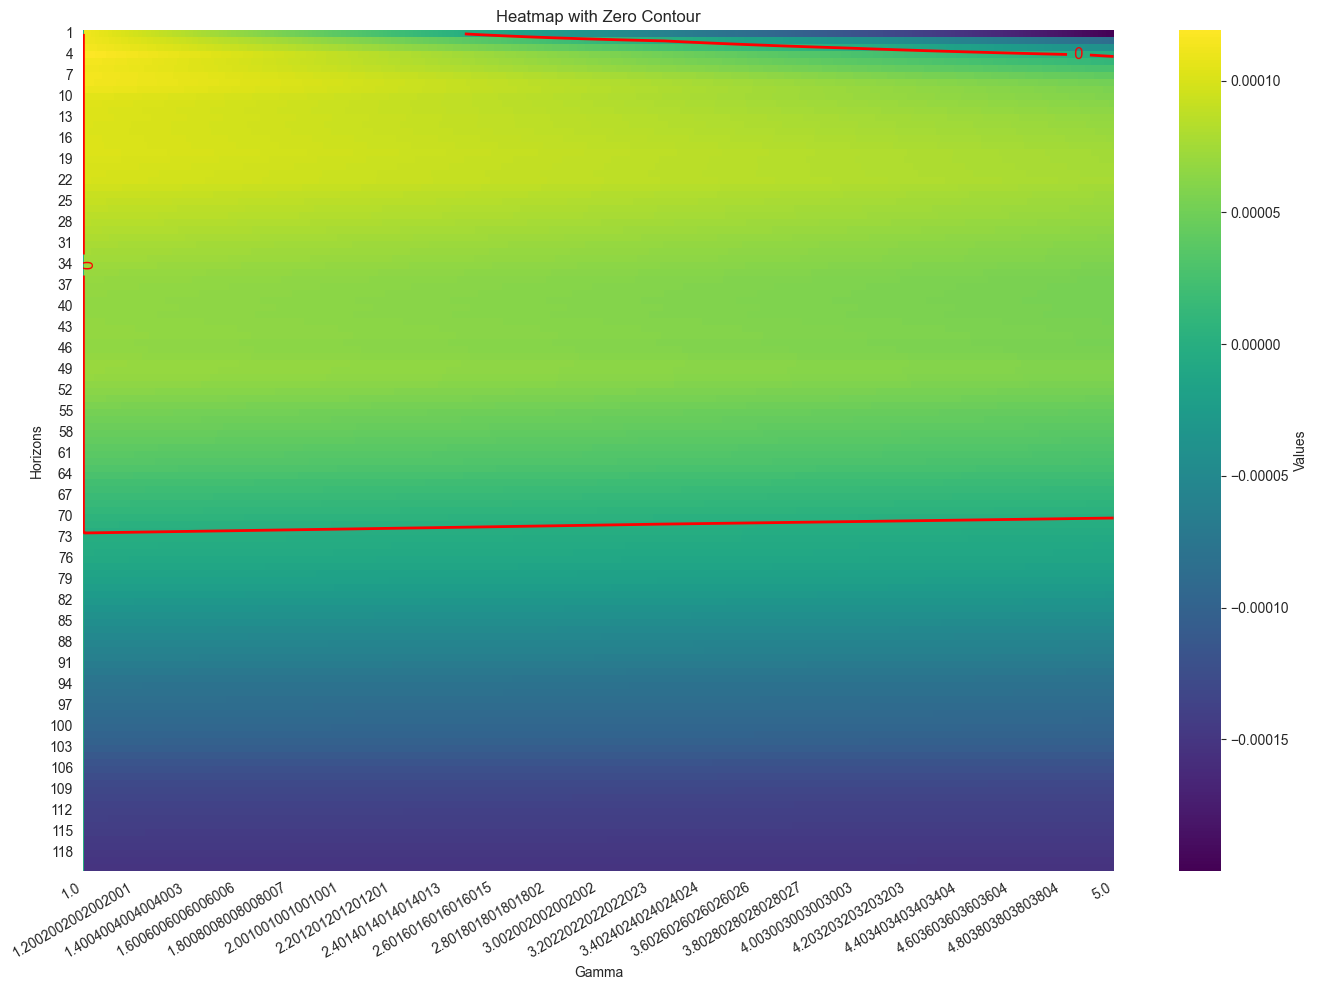

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker

# — assume df_numeric is your fully numeric DataFrame —

# 1) Prepare the X/Y grid for contouring:
X = np.arange(df_numeric.shape[1])
Y = np.arange(df_numeric.shape[0])
Xg, Yg = np.meshgrid(X, Y)

# 2) Plot heatmap:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_numeric, ax=ax, cmap='viridis', cbar_kws={'label':'Values'})

# 3) Overlay zero‐contour:
#    levels=[0] draws only the line where value == 0
cs = ax.contour(
    Xg + 0.5,         # shift so contours align with cell centers
    Yg + 0.5,
    df_numeric.values,
    levels=[0],
    colors='red',   # pick a contrasting color
    linewidths=2
)

# 4) (Optional) Label the contour:
ax.clabel(cs, colors='red', fontsize=12)

# 5) Tidy up ticks and labels:
#    Show every 5th column tick as before
import numpy as np

positions = np.arange(len(df_plot.columns))[::50]
positions = np.append(positions, len(df_plot.columns))
labels    = df_plot.columns[::50]
labels    = list(labels)
labels.append(df_plot.columns[-1])

ax.set_xticks(positions) 
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_xlabel('Gamma')
ax.set_ylabel('Horizons')
ax.set_title('Heatmap with Zero Contour')

plt.tight_layout()
plt.show()


In [157]:
labels = list(labels)
labels.append("5.00")

labels

['1.00',
 '1.20',
 '1.40',
 '1.60',
 '1.80',
 '2.00',
 '2.20',
 '2.40',
 '2.60',
 '2.80',
 '3.00',
 '3.20',
 '3.40',
 '3.60',
 '3.80',
 '4.00',
 '4.20',
 '4.40',
 '4.60',
 '4.80',
 5,
 '5',
 '5.0',
 '5.00']

ValueError: invalid literal for int() with base 10: '5.00'

In [65]:
positions + 500000000

array([500000000, 500000050, 500000100, 500000150, 500000200, 500000250,
       500000300, 500000350, 500000400, 500000450, 500000500, 500000550,
       500000600, 500000650, 500000700, 500000750, 500000800, 500000850,
       500000900, 500000950])

### All possible timeframes

In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src import Analyzer
from src import RiskTests
from src.utils.params import ReturnParams

return_params = ReturnParams(
    horizons={},  
    start_date=None,
#    end_date="2020-02-03",
    cumulative=False,
    append_start=False
)

an_voo = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="number", dl_kwargs={"weights_method":"dollar"})


rt_voo = RiskTests(an_voo)



2025-05-02 12:41:07,298 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:80)
2025-05-02 12:41:13,687 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:172)


In [ ]:
all_ret_df = rt_voo.build_all_pairs_dataframe()


100%|██████████| 144991/144991 [00:19<00:00, 7497.32it/s] 


Gamma: -5.43728


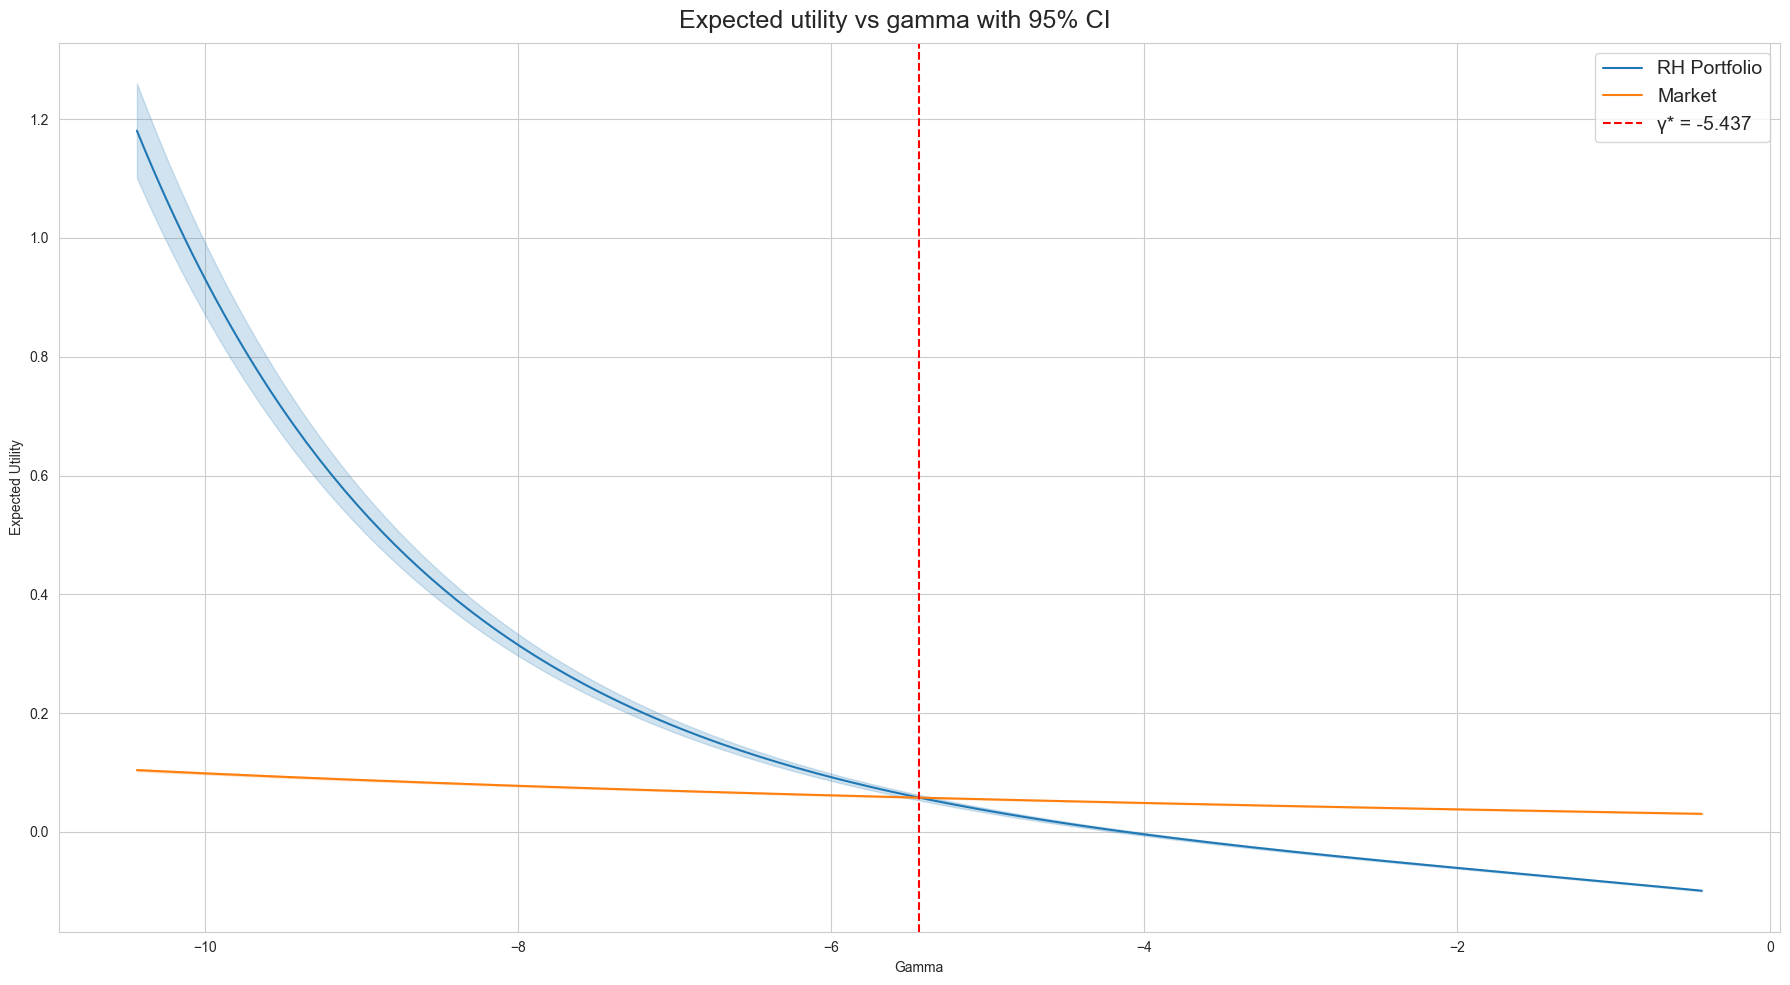

np.float64(-5.437281299436248)

In [ ]:

rt_voo.find_cutoff_gamma(df_returns=all_ret_df-1)

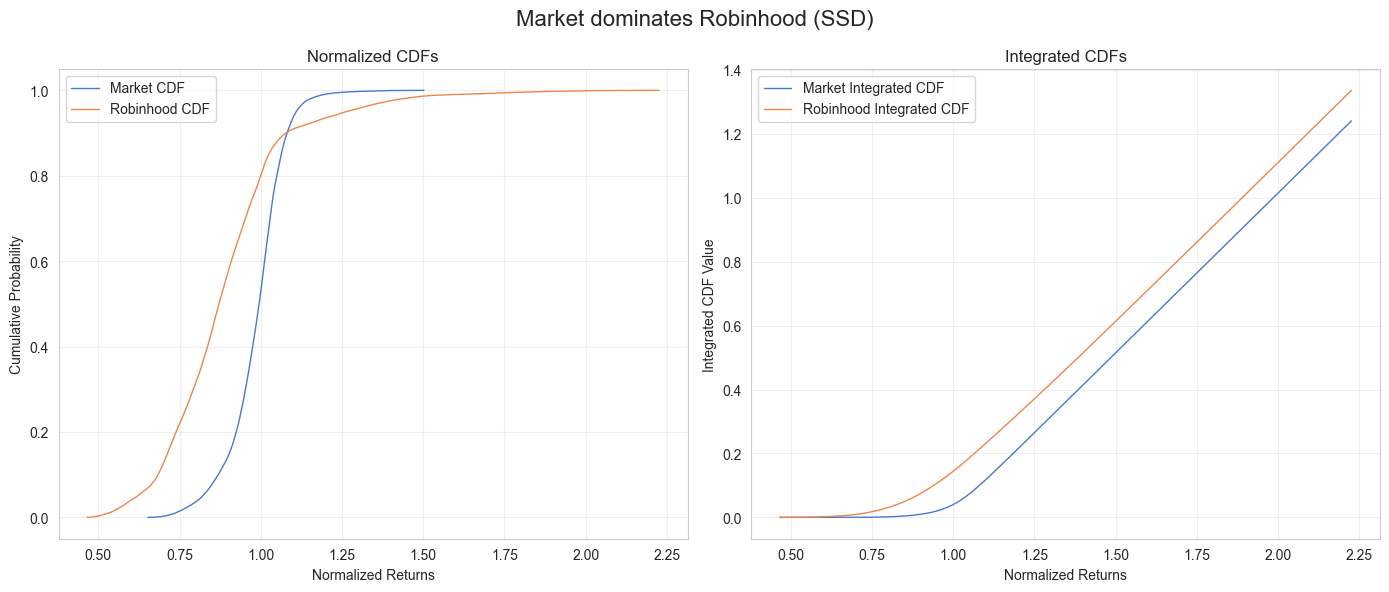

np.True_

In [33]:
from src.visuals.plotter import Plotter, ReturnSeries


plotter = Plotter([ReturnSeries(label="GMM", df=all_ret_df, horizons=[1])])
plotter.plot_ssd_comparison(all_ret_df["xmkt"], all_ret_df["xr"], "Market", "Robinhood")

**Can't do bootstrapping as it assumes independent samples**

## Euler

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
from src import Analyzer
from src import RiskTests
from src.utils.params import ReturnParams

import numpy as np

return_params = ReturnParams(
    horizons={},  
    start_date=None,
#    end_date="2020-02-03",
    cumulative=False,
    append_start=False
)

an_voo = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="wealth", dl_kwargs={"weights_method":"dollar"})


rt_voo = RiskTests(an_voo)
daily_factors = rt_voo.factors
daily_factors.describe()

2025-05-18 12:47:27,525 - src.analyzer - INFO - ------------------------------ Analysis Started ------------------------------ (analyzer.py:80)
2025-05-18 12:47:30,718 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:204)


xmkt         smb         hml         rmw         cma          rf  \
count  539.000000  539.000000  539.000000  539.000000  539.000000  539.000000   
mean     0.000460   -0.000415   -0.000761    0.000168   -0.000053    0.000066   
std      0.016153    0.007641    0.010633    0.004251    0.003877    0.000033   
min     -0.120000   -0.045800   -0.047100   -0.017900   -0.015700    0.000000   
25%     -0.004100   -0.004300   -0.005400   -0.002400   -0.002300    0.000060   
50%      0.001200   -0.000800   -0.001400    0.000100   -0.000200    0.000070   
75%      0.006800    0.003350    0.004050    0.002600    0.001900    0.000090   
max      0.093400    0.057300    0.045900    0.017000    0.014500    0.000100   

              umd  rh_portfolio          xr         mkt  
count  539.000000    539.000000  539.000000  539.000000  
mean     0.000084      0.000609    0.000544    0.000526  
std      0.012773      0.020192    0.020195    0.016152  
min     -0.061800     -0.117828   -0.117888   -0.119940  
25%     -0.005200     -0.006983   -0.007065   -0.004025  
50%      0.001000      0.000725    0.000635    0.001280  
75%      0.005900      0.008794    0.008704    0.006890  
max      0.060100      0.102957    0.102897    0.093460

In [ ]:
monnthly_factors = rt_voo.resample_factors()
monnthly_factors

rh_portfolio        rf       mkt        xr      xmkt
2018-06-30      0.009446  0.001201 -0.004678  0.008236 -0.005872
2018-07-31     -0.002451  0.001681  0.033907 -0.004126  0.032174
2018-08-31      0.072512  0.001471  0.042713  0.070942  0.041184
2018-09-30      0.007566  0.001521  0.002393  0.006036  0.000871
2018-10-31     -0.105207  0.001842 -0.074961 -0.106861 -0.076667
2018-11-30      0.001672  0.001681  0.018705 -0.000010  0.016996
2018-12-31     -0.107692  0.001902 -0.093553 -0.109396 -0.095283
2019-01-31      0.132882  0.001601  0.068122  0.131084  0.066421
2019-02-28      0.056941  0.001902  0.035840  0.054940  0.033878
2019-03-31      0.010753  0.001892  0.012719  0.008846  0.010808
2019-04-30      0.030618  0.002102  0.041622  0.028459  0.039441
2019-05-31     -0.090822  0.001982 -0.067408 -0.092628 -0.069258
2019-06-30      0.071717  0.001802  0.071324  0.069796  0.069403
2019-07-31     -0.014401  0.001982  0.014264 -0.016352  0.012259
2019-08-31     -0.065231  0.001541 -0.024072 -0.066675 -0.025576
2019-09-30     -0.006704  0.001802  0.015955 -0.008491  0.014129
2019-10-31      0.003792  0.001611  0.022256  0.002177  0.020613
2019-11-30      0.031391  0.001201  0.039997  0.030156  0.038752
2019-12-31      0.040108  0.001471  0.029133  0.038583  0.027624
2020-01-31     -0.041720  0.000780 -0.022811 -0.042470 -0.023575
2020-02-29     -0.061820  0.001141 -0.080160 -0.062893 -0.081213
2020-03-31     -0.170803  0.001321 -0.132547 -0.171908 -0.133700
2020-04-30      0.201467  0.000000  0.135644  0.201467  0.135644
2020-05-31      0.096868  0.000000  0.055992  0.096868  0.055992
2020-06-30      0.111112  0.000000  0.025070  0.111112  0.025070
2020-07-31      0.036131  0.000000  0.057584  0.036131  0.057584
2020-08-31      0.054448  0.000000  0.035171  0.054448  0.035171

In [ ]:
gamma_gmm = rt_voo.estimate_euler_gamma(df_returns=daily_factors)
gamma_gmm

np.float64(3.0714922378400455)

Gamma: 1.12160


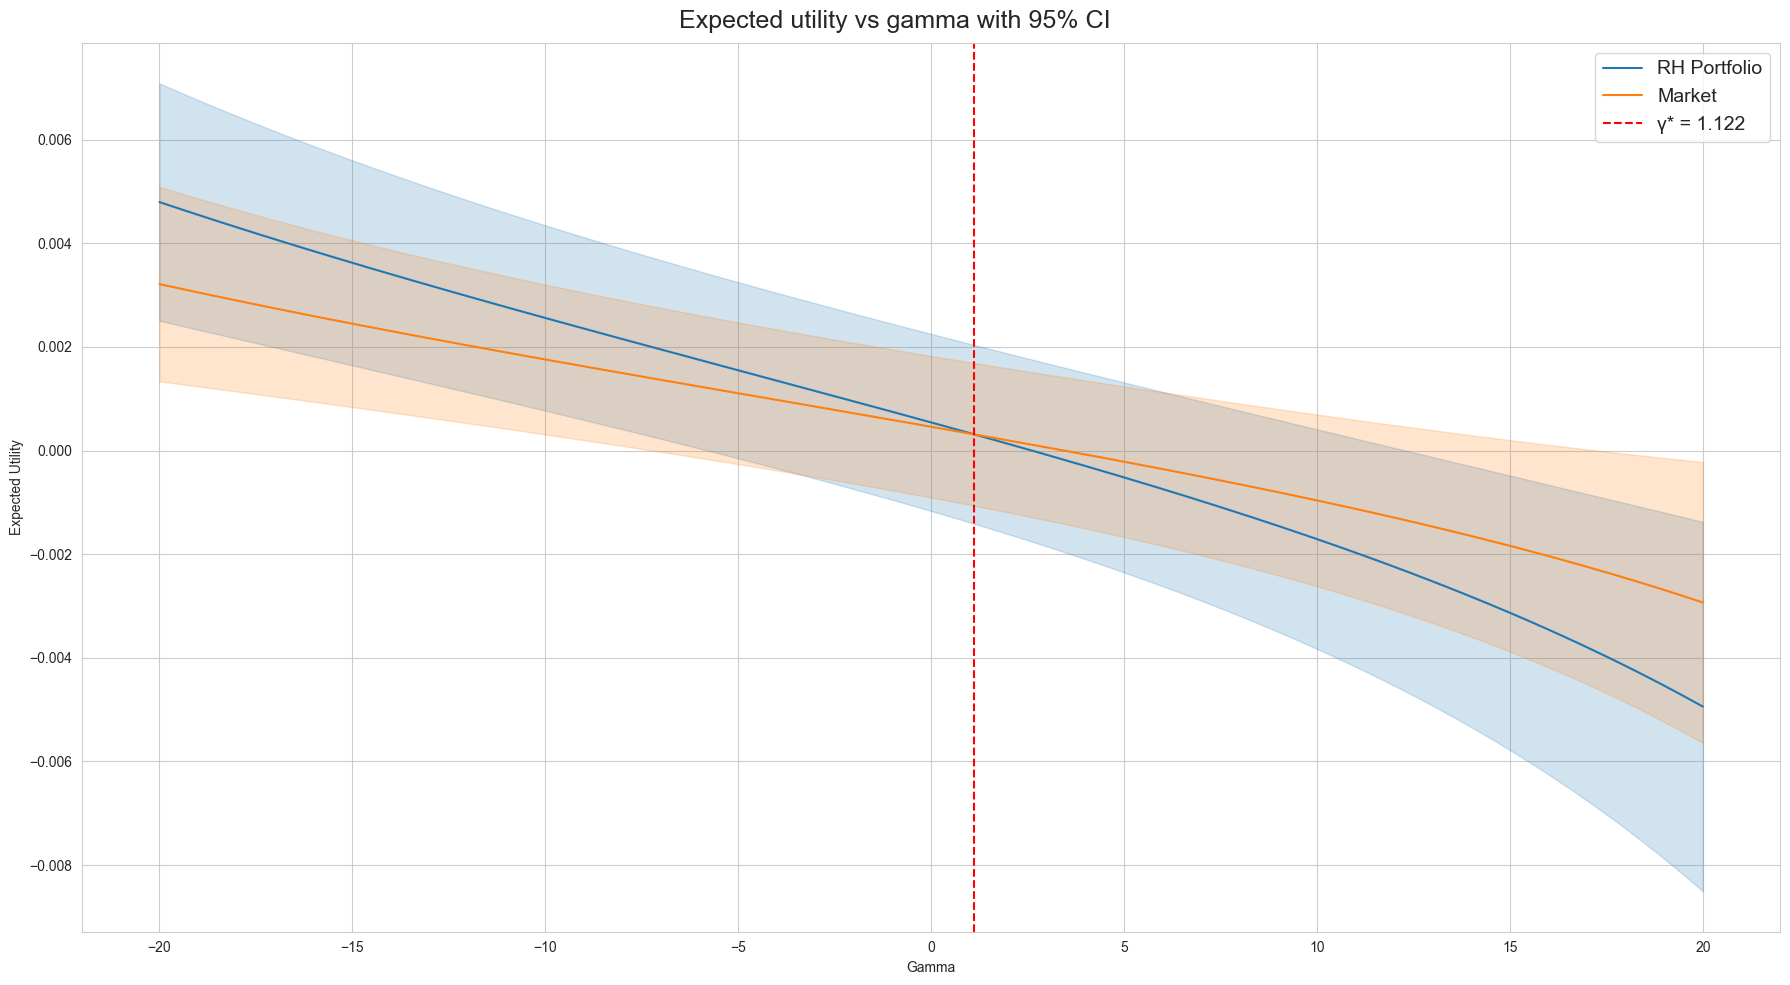

np.float64(1.1216008776527822)

In [ ]:
rt_voo.find_cutoff_gamma(bounds=(-20,20))

In [ ]:
df_voo = daily_factors +1
df_voo

rh_portfolio       rf       mkt        xr      xmkt
2018-06-04      1.007979  1.00006  1.005061  1.007919  1.005001
2018-06-05      1.007667  1.00006  0.999735  1.007607  0.999675
2018-06-06      1.009567  1.00006  1.008749  1.009507  1.008689
2018-06-07      0.995441  1.00006  0.996583  0.995381  0.996523
2018-06-08      1.003475  1.00006  1.002242  1.003415  1.002182
...                  ...      ...       ...       ...       ...
2020-08-07      0.996141  1.00000  0.996542  0.996141  0.996542
2020-08-10      1.019014  1.00000  1.002726  1.019014  1.002726
2020-08-11      0.980078  1.00000  0.996910  0.980078  0.996910
2020-08-12      1.006672  1.00000  1.015001  1.006672  1.015001
2020-08-13      1.004269  1.00000  0.997313  1.004269  0.997313

[539 rows x 5 columns]

In [ ]:
rt_voo.bootstrap_difference_utility(df_returns=df_voo, gamma0=gamma_gmm)

ΔU (xmkt - rh_portfolio) at γ=3.071: -0.00017 [-0.00097, 0.00061]


(np.float64(-0.00017284581852384324),
 np.float64(-0.0009742359888587294),
 np.float64(0.0006114926814635308))

In [39]:
daily_factors

rh_portfolio       rf       mkt        xr      xmkt
2018-06-04      0.007979  0.00006  0.005061  0.007919  0.005001
2018-06-05      0.007667  0.00006 -0.000265  0.007607 -0.000325
2018-06-06      0.009567  0.00006  0.008749  0.009507  0.008689
2018-06-07     -0.004559  0.00006 -0.003417 -0.004619 -0.003477
2018-06-08      0.003475  0.00006  0.002242  0.003415  0.002182
...                  ...      ...       ...       ...       ...
2020-08-07     -0.003859  0.00000 -0.003458 -0.003859 -0.003458
2020-08-10      0.019014  0.00000  0.002726  0.019014  0.002726
2020-08-11     -0.019922  0.00000 -0.003090 -0.019922 -0.003090
2020-08-12      0.006672  0.00000  0.015001  0.006672  0.015001
2020-08-13      0.004269  0.00000 -0.002687  0.004269 -0.002687

[539 rows x 5 columns]

In [ ]:
rt_voo.bootstrap_gamma(daily_factors)

γ̂^GMM = 3.0715
95% BCa CI = [0.9072, 19.8172]


{'gamma_estimate': np.float64(3.0714922378400455),
 'ci_lower': np.float64(0.9072428346440041),
 'ci_upper': np.float64(19.817195964133305),
 'confidence_level': 0.95,
 'n_resamples': 5000}

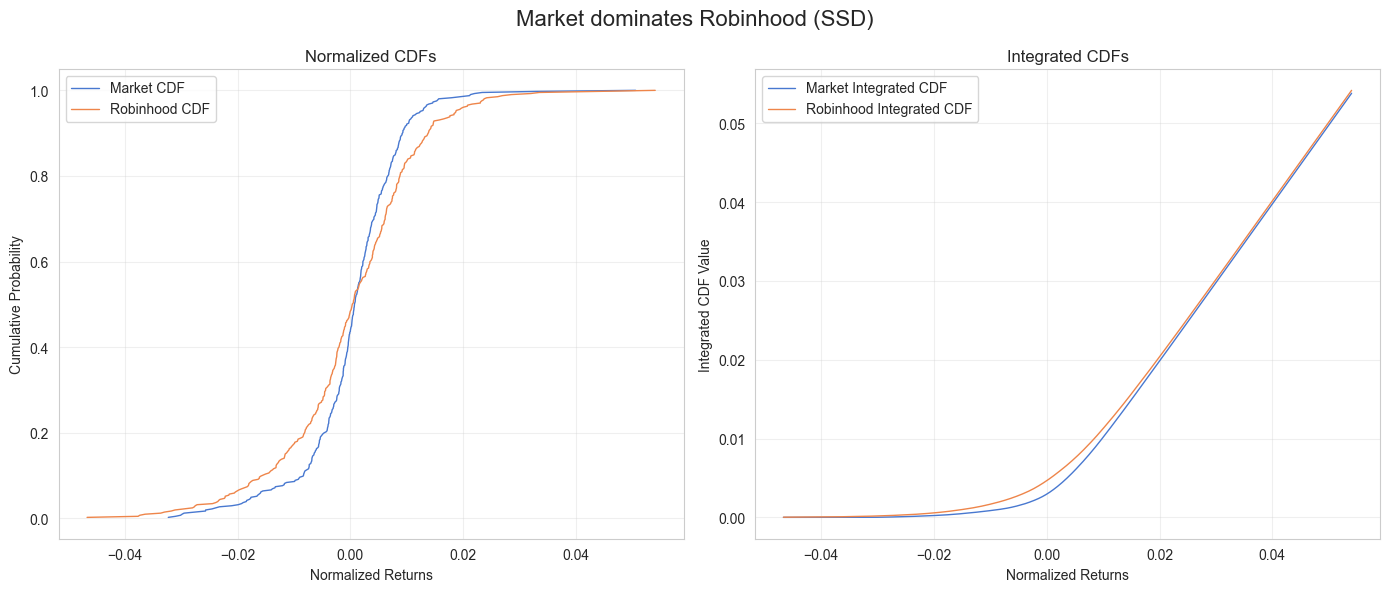

np.True_

In [45]:
from src.visuals.plotter import Plotter, ReturnSeries


plotter = Plotter([ReturnSeries(label="GMM", df=daily_factors, horizons=[])])
plotter.plot_ssd_comparison(daily_factors["mkt"], daily_factors["rh_portfolio"], "Market", "Robinhood")

## $\gamma$ in a given interval

In [1]:
%load_ext autoreload 
%autoreload 2

In [11]:
import numpy as np
import pandas as pd

from src import Analyzer
from src import RiskTests
from src.utils.params import ReturnParams



return_params = ReturnParams(
    horizons={30},  
    start_date=None,
#    end_date="2020-02-03",
    cumulative=False,
    append_start=False
)

an_voo = Analyzer(compare_tickers=["VOO"], return_params=return_params, stocks_only=False, weights_application="number", dl_kwargs={"weights_method":"dollar"})
rt_voo = RiskTests(an_voo, ff_mkt_index=False)
an_vt = Analyzer(compare_tickers=["VT"], return_params=return_params, stocks_only=False, weights_application="number", dl_kwargs={"weights_method":"dollar"})
rt_vt = RiskTests(an_vt, ff_mkt_index=False)


2025-05-23 16:42:10,114 - src.analyzer - INFO - ------------------------------ Analysis Started ------------------------------ (analyzer.py:80)
2025-05-23 16:42:16,309 - src.analyzer - INFO - ------------------------------ Analysis Started ------------------------------ (analyzer.py:80)


### Estimating $\gamma$ in closed form

In [12]:
def gamma_closed_form(col, alpha):
    mu = col.mean()
    s2 = col.var()



    gamma = mu/(alpha*s2)
    return gamma

In [ ]:
d = 802
rt_voo.resample_factors(f"{d}D")

xmkt       smb       hml       rmw       cma        rf  \
2018-06-04  0.15282 -0.213079 -0.356605  0.089409 -0.032212  0.036033   

                umd  rh_portfolio       mkt        xr  
2018-06-04  0.00116      0.178502  0.194371  0.137457

            xmkt         xr
count  27.000000  27.000000
mean    0.008203   0.010882
std     0.073740   0.112342
min    -0.270938  -0.304271
25%     0.001688  -0.013890
50%     0.028820   0.004533
75%     0.039954   0.049387
max     0.145671   0.355326


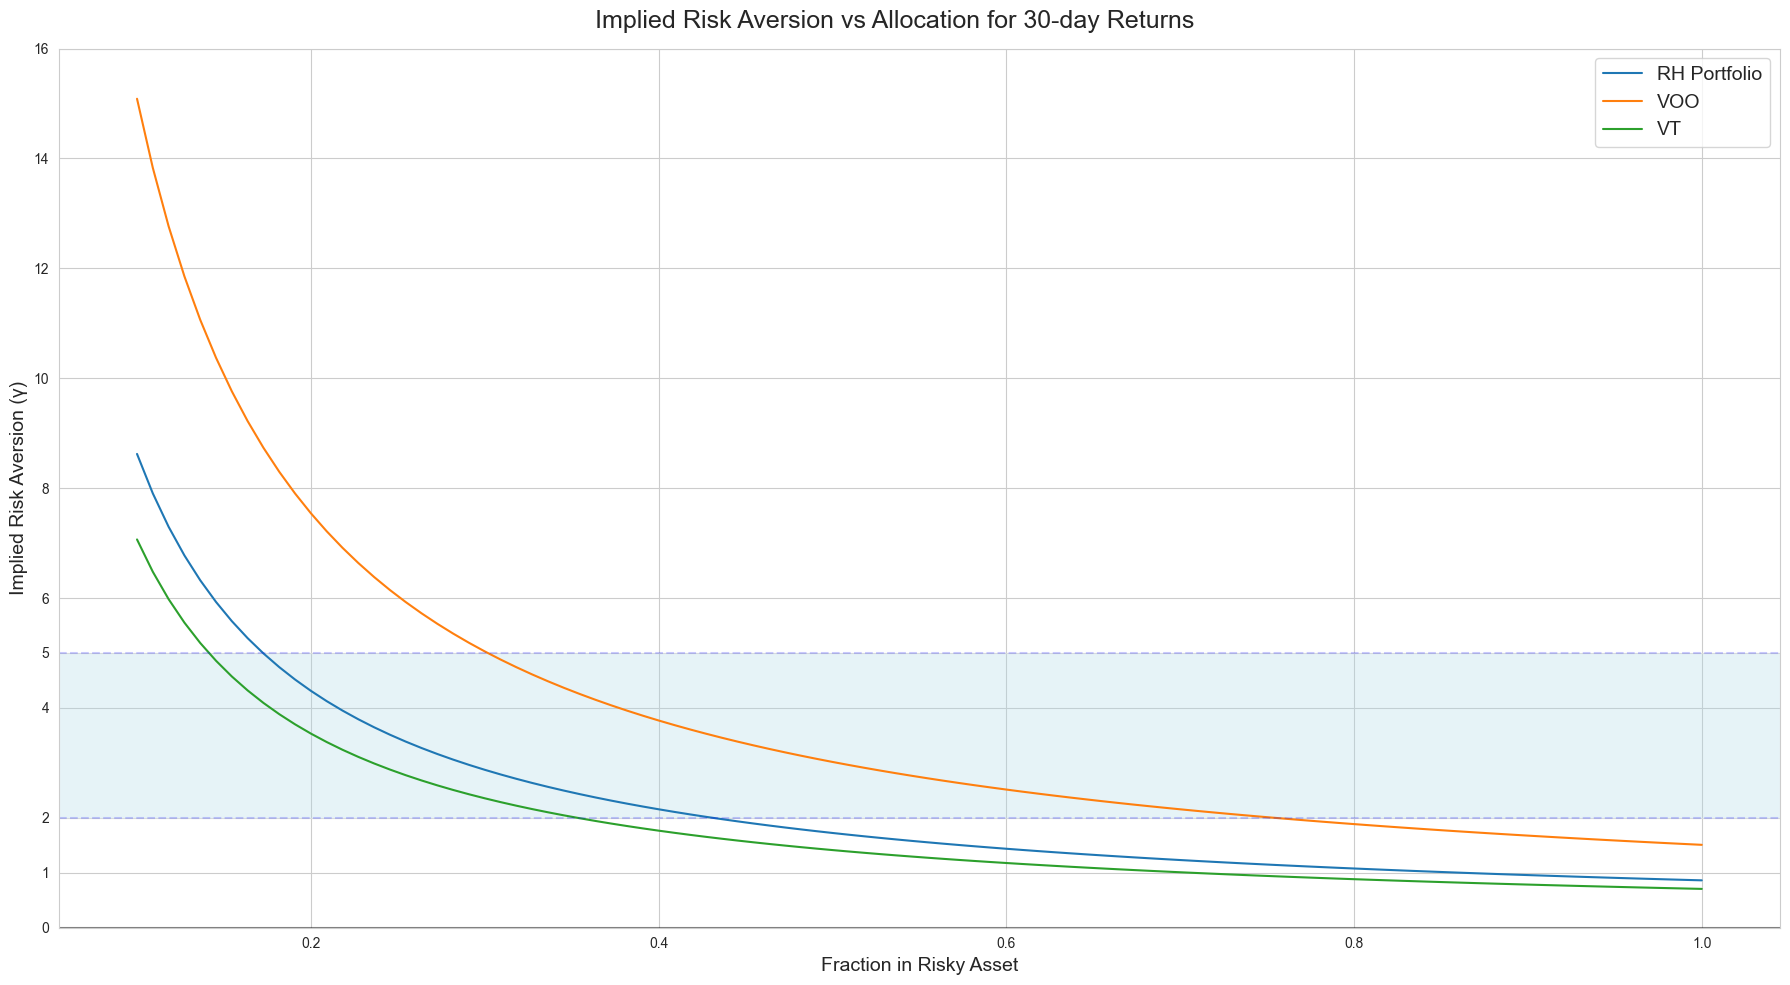

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

mkt = "xmkt"

d = 30

df_voo = rt_voo.resample_factors(f"{d}D")
df_vt = rt_vt.resample_factors(f"{d}D")
#print(df_roll.index[0])
#df = df[df.index>="2018-07-16"]
#df = df[df.index<="2020-02-03"]
print(df_voo[["xmkt", "xr"]].describe())


alphas = np.linspace(0.1, 1, 100)

utilities_rh_portfolio   = [gamma_closed_form(df_voo["xr"], a) for a in alphas]
utilities_voo = [gamma_closed_form(df_voo[mkt], a) for a in alphas]
utilities_vt = [gamma_closed_form(df_vt[mkt], a) for a in alphas]


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(18, 10))

# Highlight the γ range between 1 and 5
ax.axhspan(2, 5, facecolor='lightblue', alpha=0.3)

# Plot RH portfolio
sns.lineplot(x=alphas, y=utilities_rh_portfolio, ax=ax, label='RH Portfolio')

# Plot market and negative market
sns.lineplot(x=alphas, y=utilities_voo, ax=ax, label='VOO')
#sns.lineplot(x=alphas, y=[-u for u in utilities_xmkt], ax=ax, label='Negative Market')
sns.lineplot(x=alphas, y=utilities_vt, ax=ax, label='VT')

# Horizontal reference lines
ax.axhline(0, color='black', alpha=0.5)
ax.axhline(2, color='blue', linestyle="--", alpha=0.2)
ax.axhline(5, color='blue', linestyle="--", alpha=0.2)

# Labels and title
ax.set_xlabel('Fraction in Risky Asset', fontsize=14)
ax.set_ylim(0)
ax.set_ylabel('Implied Risk Aversion (γ)', fontsize=14)
fig.suptitle(f'Implied Risk Aversion vs Allocation for {d}-day Returns', fontsize=18)

# grab the current ticks
current = list(ax.get_yticks())

# make sure 1 and 5 are in there
for y in (1, 5):
    if y not in current:
        current.append(y)

# sort them
current = sorted(current)

# re-apply
ax.set_yticks(current)


ax.legend(fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
from src.utils.metrics import 